In [3]:
# importing libraries and loading files


import pandas as pd
from matplotlib import pyplot as plt

path = r"E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Data"

ball = pd.read_excel("E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Ball_by_Ball.xlsx")

match = pd.read_excel("E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Match.xlsx")

player = pd.read_excel('E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Player.xlsx')

player_match = pd.read_excel('E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Player_Match.xlsx')

season = pd.read_excel('E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Season.xlsx')

team = pd.read_excel('E:/github/IPL-Data-Analysis-master/IPL-Data-Analysis-master/IPL Dateset/Team.xlsx')

In [4]:
# PS: Number of matches won by each team in IPL histroy

Won_match = pd.crosstab(index= match['Match_Winner_Id'], columns='count').reset_index()
Team_wise_win = pd.merge(Won_match, team[['Team_Id', 'Team_Short_Code']], left_on="Match_Winner_Id",
                        right_on="Team_Id")
Team_wise_win = Team_wise_win[['Team_Short_Code', 'count']]

Team_wise_win.sort_values(by= "count", ascending= False)

,Team_Short_Code,count
6,MI,80
2,CSK,79
1,RCB,70
0,KKR,68
3,KXIP,63
4,RR,63
5,DD,56
10,SRH,34
7,DC,29
9,PW,12


In [5]:
# Percentage of wins for each team

Total_match_at_home = pd.crosstab(index=match['Team_Name_Id'], columns='Home_Match').reset_index()

Total_match_away = pd.crosstab(index=match['Opponent_Team_Id'], columns="Away_Match").reset_index()

# Total Matches

Total_match = pd.merge(Total_match_at_home, Total_match_away, left_on='Team_Name_Id', 
                       right_on='Opponent_Team_Id')

# Adding a columns of total match

Total_match['Total'] = Total_match['Home_Match'] + Total_match['Away_Match']

# Selecting only the column with Team Name ID and Total

Total_match = Total_match[['Team_Name_Id', 'Total']]

# Lets get the team name

Total_match = pd.merge(Total_match, team[['Team_Id', 'Team_Short_Code']], left_on="Team_Name_Id", 
                      right_on='Team_Id')

Total_match = Total_match[['Team_Short_Code', 'Total']]

Final_table = pd.merge(Team_wise_win, Total_match)

# Percentage win for each team

Final_table['Percent_win'] = round(((Final_table['count']/Final_table['Total'])*100),2)

Final_table.sort_values(by = 'Percent_win', ascending = False)

,Team_Short_Code,count,Total,Percent_win
2,CSK,79,131,60.31
6,MI,80,140,57.14
12,GL,9,16,56.25
10,SRH,34,62,54.84
4,RR,63,118,53.39
0,KKR,68,132,51.52
1,RCB,70,139,50.36
3,KXIP,63,134,47.01
8,KTK,6,14,42.86
5,DD,56,133,42.11


In [6]:
# Two way cross table

# No. of matches won by each team while batting first and chasing

Team_wise_win_type = pd.crosstab(index=match['Match_Winner_Id'], columns=match['Win_Type']).reset_index()

Team_wise_win_type = pd.merge(Team_wise_win_type, team[['Team_Id', 'Team_Short_Code']], 
                              left_on="Match_Winner_Id", right_on="Team_Id")

Team_wise_win_type = Team_wise_win_type[['Team_Short_Code', 'by runs', 'by wickets', 'Tie']]

# lets rename the column

Team_wise_win_type = Team_wise_win_type.rename(columns= { 
    "Team_Short_Code" :" Team", "by runs" : "Batting First", "by wickets" : "Chasing", 
    "Tie" : "Match Tied"
})

Team_wise_win_type

,Team,Batting First,Chasing,Match Tied
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


In [7]:
# Create a table containing team name scoring maximum runs - season wise

TWSWR = ball.groupby(['Season_Id', 'Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()

TWSWR['Rank'] = TWSWR.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending=False)

# Now we can filter the data where ever its is ranked as 1

Result = TWSWR[(TWSWR.Rank == 1)]

Result

,Season_Id,Team_Batting_Id,Batsman_Scored,Rank
4,1,5,2420,1.0
15,2,8,2283,1.0
22,3,7,2661,1.0
26,4,3,2461,1.0
36,5,3,2716,1.0
49,6,7,2841,1.0
55,7,4,2824,1.0
66,8,7,2611,1.0
69,9,2,2859,1.0


Univariante Analysis

Few visulazition methods used in Univariate Analysis :

1) Bar Charts. 2) Histograms. 3) Frequency Polygons. 4) Pie Charts.

          Inning   Runs
0   First Inning  86891
1  Second Inning  79059


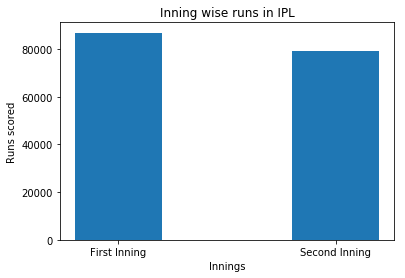

In [8]:
# Univariate Analysis 
# PS 1: Is team batting first scoring more runs or team chasing scoring more runs?

Runs_by_innings = ball.groupby('Innings_Id')['Batsman_Scored'].sum().reset_index().sort_values(by = 'Batsman_Scored')

# Actually Inning ID 3 and 4 refer to innings 1st or 2nd in super over match. This we can club them with 1 and 2 respt.

First_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 1) | (Runs_by_innings['Innings_Id'] == 3)]['Batsman_Scored'].sum()

Second_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 2) | (Runs_by_innings['Innings_Id'] == 4)]['Batsman_Scored'].sum()

# lets create the list of two columns

Final_Data = pd.DataFrame()

Inning = ['First Inning', 'Second Inning']

Runs = [First_Inning_runs, Second_Inning_runs]

Final_Data['Inning'] = Inning

Final_Data['Runs'] = Runs

print(Final_Data)

# Lets Plot this in form of a bar chart

from matplotlib import pyplot as plt

plt.bar(Final_Data['Inning'], Final_Data['Runs'], width= .4)

plt.xlabel('Innings')

plt.ylabel('Runs scored')

plt.title('Inning wise runs in IPL')

plt.show()

In [9]:
# Solution to Top 3 batsman based on centuries

Centuries_table = ball.groupby(['Match_Id', 'Striker_Id'])['Batsman_Scored'].sum().reset_index()

# Creating the column of century

Centuries_table['Century'] = Centuries_table['Batsman_Scored'].apply(lambda x: 'Cent' if x > 99 else 'No')

# You can also use numpy where function

# Centuries_table['Century'] = np.where(Centuries_table['Batsman_Scored']>99, "Cent", "No")

Centuries_table

# Now lets filter the rows which contain Cent

Cent_table = Centuries_table[(Centuries_table['Century'] == "Cent")]

# Cross table on Striker ID to get the count of centuries for each player

Final_Table = pd.crosstab(index=Cent_table['Striker_Id'], columns='No. of Centuries').reset_index()

Final_Table.sort_values(by = 'No. of Centuries', ascending = False).head(3)

col_0,Striker_Id,No. of Centuries
19,162,5
1,8,4
16,110,3


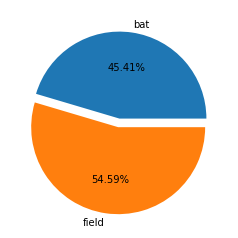

In [10]:
# Decision after winning the toss

Toss_decision = match.groupby(['Toss_Decision']).size().reset_index()

# Lets rename the column

Toss_decision = Toss_decision.rename(columns= {0 : "Number of Matches"})

# We will use autopct to indicate percent lables on pie chart

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%',explode = (0, 0.1))

plt.show()